# DEAMデータを使った回帰モデル

## データ読み込み

In [3]:
import pandas as pd
import numpy as np
import os
df = pd.read_csv("./attribute_combined.csv")
dfff = pd.read_csv("/Users/kawabemoyu/program/myprogram/Diffusion-LM-on-Symbolic-Music-Generation/improved-diffusion/emogen/jSymbolic_lib/DEAM_midi_attribute.csv")

combined_df = pd.concat([df,dfff], ignore_index=True)
combined_df.to_csv("./attribute_combined.csv", index=False, encoding='utf-8')

### Valence-Arousal値の読み込み

In [ ]:
import pandas as pd
import numpy as np
import os

df_VA = pd.read_csv("./VA_combined.csv") #, usecols=[' valence_mean', ' arousal_mean'])

df_midiname0 = df_VA['song_id'].values 
df_valence = (df_VA[' valence_mean'].values - 5.0 ) / 4.0 # valence_mean
df_arousal = (df_VA[' arousal_mean'].values - 5.0 ) / 4.0 # arousal_mean

VA = np.array([df_valence,df_arousal]).T

print(VA.shape)
print(VA)
print(np.amin(VA[:,0]))

(1802, 2)
[[-0.475  -0.5   ]
 [-0.375  -0.425 ]
 [ 0.175   0.125 ]
 ...
 [ 0.     -0.1   ]
 [-0.4575  0.4575]
 [-0.3     0.2   ]]
-0.85


* valence , arousal の分布

In [ ]:
from matplotlib import pyplot as  plt
import seaborn as sns
import japanize_matplotlib
import numpy as np

plt.style.use('seaborn')
plt.rcParams['font.family'] = 'IPAexGothic'  

a = VA[:,0]
b = VA[:,1]
print(a[1])
#n = 0
#plt.scatter(a,b)
color_list = [ "g", "y" ,"m", "c"] #, "k"]
for n in range(len(VA[:,0])):
    if (a[n] >= 0 )& (b[n] >= 0):
        plt.scatter(a[n], b[n], 20 ,color_list[0])
    elif (a[n] >= 0 )& (b[n] < 0):
        plt.scatter(a[n], b[n], 20,color_list[1])
    elif (a[n] < 0 )& (b[n] >= 0):
        plt.scatter(a[n], b[n], 20, color_list[2])
    else:
        plt.scatter(a[n], b[n], 20,color_list[3])
    

plt.xlim(-1.0 , 1.0) # (3)x軸の表示範囲
plt.ylim(-1.0 , 1.0) # (4)y軸の表示範囲
plt.xticks(np.arange(-1.0, 1.0 ,0.20))
plt.yticks(np.arange(-1.0, 1.0 , 0.20)) # plt.tick_params(width = 0.005, length = 0.005)

plt.xlabel('Valence' , fontsize=15)
plt.ylabel('Arousal' , fontsize=15)
plt.hlines(0,-1,1, "k",linestyle="-")
plt.vlines(0,-1,1, "k", linestyle="-")
plt.title('DEAMでマッピングを行った入力感情グラフ', fontsize=15)

### 音楽属性値読み込み

In [3]:
import pandas as pd
import numpy as np
import os

df = pd.read_csv("./attribute_combined.csv")
# print(df['0'].values)#.split('/').split('.')[-1])
df_midiname = []
df_attribute = np.zeros((0,1495))#,100)
#print(df_attribute)

for i in range(len(df['0'].values)):
    #print(df['0'].values[i][-8:-4]) 
    df1 = df['0'].values[i].split('/')  # ディレクトリごとに区切る # np.genfromtxt：複雑なファイルの読み込み
    df1 = df1[-1].split('.') # 番号と'mid'を区切る
    df_midiname.append(int(df1[0])) # sortできるように、整数変換
    #print(df1)
    
    df2 = df.iloc[i,1:].values # iloc：行、列番号を指定
    #df_attribute.append(df2)
    df_attribute = np.append(df_attribute , np.array(df2))#,axis=0) 
    # df_attribute[int(df1[0]),:] = np.array(df2)
    
# midi番号
df_midiname  
#df_midiname.sort()
# midi属性値
df_attribute = np.reshape(df_attribute , [len(df['0'].values), 1495]) # np.reshape：形状変形
print(len(df_midiname))
print(df_midiname)
print(df_attribute)

/tmp/ipykernel_1686666/1626472477.py:3: DtypeWarning: Columns (538) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./attribute_combined.csv")


1802
[1999, 1769, 202, 1027, 1741, 1796, 1755, 1033, 558, 216, 1966, 1972, 1782, 1557, 1231, 564, 799, 955, 1345, 996, 941, 49, 1437, 1423, 1351, 1386, 174, 160, 148, 606, 1392, 1147, 1621, 1153, 1635, 1184, 410, 1190, 1191, 1813, 1807, 1185, 405, 1634, 1152, 1608, 607, 1387, 175, 1393, 613, 60, 1378, 820, 808, 1422, 48, 773, 1581, 767, 997, 983, 1218, 798, 968, 1230, 1224, 1556, 1967, 1973, 1783, 217, 1768, 1026, 1754, 1024, 1742, 1756, 215, 1781, 1795, 1959, 201, 1965, 1971, 1554, 1226, 1232, 1540, 1568, 956, 942, 1434, 1352, 1420, 1346, 981, 1408, 759, 62, 177, 89, 1150, 611, 1385, 1636, 639, 1144, 361, 1193, 375, 407, 1187, 1839, 1811, 349, 1805, 1810, 1186, 1804, 348, 1838, 360, 1179, 406, 638, 176, 1637, 1623, 1151, 1384, 823, 1421, 88, 77, 1347, 1409, 1353, 189, 1435, 1596, 758, 980, 764, 1582, 994, 1569, 1233, 1794, 1541, 228, 1227, 1970, 1964, 2048, 1780, 214, 1019, 1757, 1958, 1743, 1025, 1031, 1009, 1747, 1753, 1035, 238, 1960, 210, 1790, 204, 1237, 1579, 1545, 1223, 1551, 9

* 属性値を昇順に並べる

In [4]:
# arrtibute 昇順
attribute = np.zeros((len(df_midiname),1495)) 
k = 0
j = 0

for j, number in enumerate(df_midiname): # [1999, 1769~
    attribute0 = []
    for ii in range(len(df_midiname)): # [1999, 1769~
            if (df_midiname0[ii] == number): #　音楽id (昇順ずみ) = midiの並べ番号
                    attribute0.append(number)
                    #attribute = np.append(attribute, df_attribute[ii])
                    attribute[ii,:]=  df_attribute[j,:]
                    k = k + 1
    if (attribute0 == []):
        print(number)
        
print(k)
np.array(attribute)
attribute = np.reshape(attribute , [len(df_midiname), 1495]) 
print(attribute)
print(attribute.shape)

1802
[[ 0.    0.    0.   ... 15.72 15.72 17.66]
 [ 0.    0.    0.   ... 17.98 17.98 17.9 ]
 [ 0.    0.    0.   ... 20.92 20.92 21.35]
 ...
 [ 0.    0.    0.   ... 19.42 19.42 18.99]
 [ 0.    0.    0.   ... 18.34 18.34 20.08]
 [ 0.    0.    0.   ... 17.81 17.81 19.26]]
(1802, 1495)


## 1. (2→100)回帰

### 音楽属性値の前処理

In [5]:
# 閾値関連
import torch.nn.functional as F
import numpy as np
import torch as th
# #音楽属性値の0,1の値を決める関数
def binarize_command(command, thresholds):
        discrete_feature = []
        #commandtanh = np.tanh(command) #05/18 閾値 → tanh
        #discrete_feature.append(commandtanh) #05/18
        for k in range(command.shape[0]):
            thres = thresholds[k]
            discrete_feature.append(np.searchsorted(thres, command[k]))
        return discrete_feature
thresholds = np.load("../../../../../../../data/threshold.npy", allow_pickle=True) #閾値
thresholds_rep = thresholds.repeat(1802,1).T #閾値の繰り返し
feature_index = np.load("../../../../../../../data/feature_index.npy", allow_pickle=True) #特徴量100
thresholds_weight0 = th.load('../../../../../../../../emogen/std_mean.pt') # 音楽属性値を揃える重み
thresholds_weight = th.where(thresholds_weight0[0,:] == 0.0, (th.tensor(0.0).float()), ((1.0 / thresholds_weight0[0,:]).float())).to('cpu').detach().numpy().copy() 

In [6]:
split_command = []
for k ,t_k in enumerate(attribute):
    binary_command = binarize_command(attribute[k][feature_index], thresholds)
    split_command.append(binary_command)
split_command = np.squeeze(np.array(split_command))
print(split_command)
print(split_command.shape)

[[0 1 0 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [0 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
(1802, 100)


* データセットの正規化

In [9]:
import numpy as np
def normalize(v, axis=0, order=2):
    l2 = np.linalg.norm(v, ord = order, axis=axis, keepdims=True)
    l2[l2==0] = 1
    return v/l2
# 3次元配列で2次元配列ごとに正規化したい場合：axis=(1,2)のように正規化したい２次元配列の軸(axis)番号を2つ指定


attribute_nrm = normalize(split_command)    # / np.linalg.norm(split_command) 
print(attribute_nrm)
coordinate_nrm = normalize(VA)    # / np.linalg.norm(split_command) 
print(coordinate_nrm)

[[0.01911623 0.02254676 0.01555836 ... 0.02690254 0.02357023 0.02357023]
 [0.00989774 0.02783107 0.0235878  ... 0.01406516 0.02357023 0.02357023]
 [0.02401538 0.02645147 0.02798146 ... 0.02826039 0.02357023 0.02357023]
 ...
 [0.03074529 0.02004971 0.02877584 ... 0.02204234 0.02357023 0.02357023]
 [0.02080362 0.0216626  0.02879323 ... 0.03058666 0.02357023 0.02357023]
 [0.02777235 0.02841256 0.02126601 ... 0.03020314 0.02357023 0.02357023]]
[[-0.03800117 -0.03637462]
 [-0.03000093 -0.03091843]
 [ 0.01400043  0.00909365]
 ...
 [ 0.         -0.00727492]
 [-0.03660113  0.03328278]
 [-0.02400074  0.01454985]]


### sklearnを使った回帰モデル (numpy) 

In [10]:
# 学習用・テスト用データに分割
from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(coordinate_nrm, attribute_nrm, test_size=0.3, random_state=0)

In [11]:
# モデルの定義、ハイパーパラメータの値を設定
from sklearn.linear_model import Ridge , LinearRegression
ridge = Ridge(alpha=0.01)
#model = LinearRegression()

In [12]:
ridge.fit(np.nan_to_num(x_train), np.nan_to_num(t_train))

print(ridge.coef_) #切片

print(ridge.intercept_) #係数

print((ridge.coef_).shape)

[[ 2.47522092e-02  1.00364688e-02]
 [-2.46032292e-04  2.12115516e-02]
 [ 2.56305849e-02  2.52961073e-02]
 [ 1.19031558e-02  8.27248030e-03]
 [ 9.11192615e-03  5.92647334e-03]
 [ 3.30678672e-02  1.23735462e-02]
 [ 1.98154586e-03 -9.89336644e-04]
 [ 1.98154586e-03 -9.89336644e-04]
 [-3.06076718e-03  6.40617362e-03]
 [-5.07297447e-02 -8.22772335e-02]
 [ 5.59799460e-02  6.55165626e-02]
 [ 1.98154586e-03 -9.89336644e-04]
 [ 1.99464189e-03 -9.80176629e-04]
 [ 1.98154586e-03 -9.89336644e-04]
 [ 1.98159007e-03 -9.89351067e-04]
 [-1.84428308e-01 -1.11485672e-01]
 [-2.65926886e-01 -2.53875544e-01]
 [-3.93070567e-02 -6.85342783e-03]
 [-5.56758278e-02 -4.65448640e-02]
 [-9.03190923e-02 -8.66941993e-02]
 [-1.58300104e-02 -1.79214699e-02]
 [ 7.93958626e-02  8.79983723e-02]
 [ 1.36738261e-01  1.19409629e-01]
 [ 1.61437213e-01  1.47063397e-01]
 [-1.46872975e-01 -8.54103506e-02]
 [-9.06467386e-02 -9.02549715e-02]
 [-4.45008395e-02 -5.38427643e-02]
 [ 8.27219024e-02  1.16310583e-02]
 [ 1.17186504e-02  7

* 予測

In [13]:
# コサイン類似度
import numpy as np

emotion1 = np.array([0.4,0.5]) # Q1
emotion2 = np.array([-0.4,0.5]) # Q2
emotion3 = np.array([-0.4,-0.5]) # Q3
emotion4 = np.array([0.4,-0.5]) # Q4

attribute100_1 = ridge.predict([emotion1])
attribute100_2 = ridge.predict([emotion2])
attribute100_3 = ridge.predict([emotion3])
attribute100_4 = ridge.predict([emotion4])

DEAM1 = np.squeeze(attribute100_1)   #np.load('./input_emotion_1_DEAM.npy'))
DEAM2 = np.squeeze(attribute100_2)   #np.load('./input_emotion_2_DEAM.npy'))
DEAM3 = np.squeeze(attribute100_3)   #np.load('./input_emotion_3_DEAM.npy'))
DEAM4 = np.squeeze(attribute100_4)   #np.load('./input_emotion_4_DEAM.npy'))

def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

DEAM1_3 = 1 - cos_sim(DEAM1,DEAM3)
DEAM2_4 = 1 - cos_sim(DEAM2,DEAM4)

print(DEAM1_3)
print(DEAM2_4)
print(cos_sim(DEAM1,DEAM3))
print(cos_sim(DEAM2,DEAM4))


1.8862588533551046
0.7015576879118204
-0.8862588533551045
0.29844231208817956


* データ保存

In [20]:
emotion1 = np.array([0.4,0.5]) # Q1
emotion2 = np.array([-0.4,0.5]) # Q2
emotion3 = np.array([-0.4,-0.5]) # Q3
emotion4 = np.array([0.4,-0.5]) # Q4
#print(ridge.predict([emotion]).tolist())
attribute1 = ridge.predict([emotion1]) # Q1
attribute2 = ridge.predict([emotion2]) # Q2
attribute3 = ridge.predict([emotion3]) # Q3
attribute4 = ridge.predict([emotion4]) # Q4
print(attribute1)
print(attribute2)
print(attribute3)
print(attribute4)
print(type(attribute1))

# DLMへの入力のファイル
np.save('input_emotion_1_DEAM', attribute1)
np.save('input_emotion_2_DEAM', attribute2)
np.save('input_emotion_3_DEAM', attribute3)
np.save('input_emotion_4_DEAM', attribute4)

[[ 8.41919748e-02  7.46856489e-02  8.12484853e-02  9.20168640e-02
   6.90712640e-02  7.91385688e-02  1.00039362e+00  1.00039362e+00
   2.60115368e-01  2.46972288e-01  4.47634501e-01  1.00039362e+00
   1.00036887e+00  1.00039362e+00  1.00039364e+00 -2.01114790e-01
  -9.44607212e-03  2.77258510e-02  2.25664217e-02  3.26046012e-02
   2.15644734e-02  1.49313109e-02  1.26202544e-02  9.97933198e-03
   4.58615922e-02  1.77144373e-01  4.19166776e-02  1.07135557e-01
   9.80173886e-01  1.00045014e+00  2.27100766e-02  4.24741215e-02
   3.23454882e-02  2.02003775e-02  2.60879777e-02  2.06485976e-02
   2.02642559e-02  1.45685679e-02  1.47880080e-02  1.27344488e-02
   9.38701677e-03  1.05550151e-02  1.03945698e-02  7.12348871e-03
   6.89271651e-03  4.89230903e-03  8.84525752e-02  7.61100718e-02
   8.13475342e-03  2.38193951e-02  1.28190546e-02  1.00223909e+00
   1.16092620e-01  2.87931062e-01  5.30635685e-01 -4.88538481e-03
   3.41327781e-02  3.82636024e-01  1.00039362e+00  1.00193805e+00
   1.00839

### sklearn回帰モデルの精度

In [44]:
# コサイン類似度
import numpy as np

def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

cos_sim_y = 0.0
for i in range(1802):
    cos_sim_y0 = cos_sim(np.squeeze(ridge.predict(VA[i,:].reshape(1, -1))), np.squeeze(split_command[i,:].reshape(1, -1))) # 256→100
    if np.isnan(cos_sim_y0) ==  False: 
        cos_sim_y = cos_sim_y + cos_sim_y0
print(cos_sim_y / 1802.0)

0.9880674223078812


<ipython-input-44-0999f5e64e78>:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
<ipython-input-44-0999f5e64e78>:5: RuntimeWarning: invalid value encountered in double_scalars
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


In [45]:
# ピアソン相関係数
corrcoef_y = 0.0
for i in range(1802):
    corrcoef_y0 = np.corrcoef(np.squeeze(ridge.predict(VA[i].reshape(1, -1))), np.squeeze(split_command[i].reshape(1, -1)))[0,1] # -1 ~ 1cpr 256→100
    if np.isnan(corrcoef_y0) ==  False:  
        corrcoef_y = corrcoef_y + corrcoef_y0
    # corrcoef_y = corrcoef_y + np.corrcoef(pred[i].cpu().detach().numpy(), vectors[i].cpu().detach().numpy())[0,1] # -1 ~ 1cpr  256→30
print(corrcoef_y / 1802) # 12301

/Users/kawabemoyu/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kawabemoyu/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/Users/kawabemoyu/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/kawabemoyu/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


0.9843314388953537


## 2. (1→18)回帰

* ニューラルネットワークを用いた回帰モデル (1→18)  
→  1次元 →18次元を直接予測！

In [7]:
import os
import torch

print(torch.cuda.is_available())
os.environ['CUDA_VISIBLE_DEVICES'] = '2' # ←　使えない。なぜ?
print(torch.cuda.device_count())

True
4


### 関数等の定義

In [8]:
import random

import torch
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

In [36]:
def computing_device(force=None):
    """環境によって計算に使うデバイスを切り替える関数"""
    if force is not None:
        return force
    if torch.cuda.is_available():
        return "cuda:2"
    if torch.backends.mps.is_available():
        return "mps"
    return "cpu"

class Valence_CtoA18(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Valence_CtoA18, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size * 2) 
        self.fc3 = nn.Linear(hidden_size * 2 , hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU() #nn.LeakyReLU(0.01) 
        self.fc5 = nn.Linear(hidden_size * 2, hidden_size * 4) 
        self.fc6 = nn.Linear(hidden_size * 4 , hidden_size * 2)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        #x = self.relu(self.fc5(x))
        #x = self.relu(self.fc6(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        
        return x
    
class Arousal_CtoA18(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Arousal_CtoA18, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size * 2) 
        self.fc3 = nn.Linear(hidden_size * 2 , hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU() # nn.LeakyReLU(0.01)
        self.fc5 = nn.Linear(hidden_size * 2, hidden_size * 4) 
        self.fc6 = nn.Linear(hidden_size * 4 , hidden_size * 2)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        #x = self.relu(self.fc5(x))
        #x = self.relu(self.fc6(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        #x = self.relu(self.fc4(x))
        return x

class Valence_CtoA18_withArousal(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Valence_CtoA18_withArousal, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size * 2) 
        self.fc3 = nn.Linear(hidden_size * 2 , hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU() # nn.LeakyReLU(0.01)
        self.lrelu = nn.LeakyReLU(0.01)
        # Dropout層
        self.aux_dropout = nn.Dropout(p=0.5)  # x2専用のDropout層 (確率を高く設定=よく消える)
        # バイアス層：input_size = 1
        self.aux_net = nn.Linear(input_size, output_size, bias=False) # バイアス項として働く,bias=Falseにすることで純粋な係数に
        with torch.no_grad(): # もしx2の影響を最初から極小にしておきたい場合、重みを小さく初期化する
            self.aux_net.weight.mul_(0.01) # 重みを0.01倍にする
        
    def forward(self, x):
        # Dropout層
        '''
        x2_dropped = self.aux_dropout(torch.squeeze(x)[:,1]) # x2 にだけ Dropout をかける [32]に次元数を減らす
        x_cat = torch.cat([torch.unsqueeze(torch.squeeze(x)[:,0],1), torch.unsqueeze(x2_dropped,1)], dim=1) # 結合してネットワークへ [32,1]
        x = self.relu(self.fc1(x_cat)
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        ''' 
        # バイアス層 
        x1 = torch.unsqueeze(torch.squeeze(x,1)[:,0],1)
        x2 = torch.unsqueeze(torch.squeeze(x,1)[:,1],1)
        x1 = self.relu(self.fc1(x1))
        x1 = self.relu(self.fc2(x1))
        x1 = self.relu(self.fc3(x1))
        main_out = self.fc4(x1) # main_out
        aux_out = self.aux_net(x2)
        #x = self.relu(main_out + aux_out) # 足し合わせてから、最終的な活性化関数(ReLU)を通す
        x = (main_out + aux_out)
        
        return x

class Arousal_CtoA18_withValence(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Arousal_CtoA18_withValence, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size * 2) 
        self.fc3 = nn.Linear(hidden_size * 2 , hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU() # nn.LeakyReLU(0.01)
        self.lrelu = nn.LeakyReLU(0.01)
        self.aux_dropout = nn.Dropout(p=0.5)  # x2専用のDropout層 (確率を高く設定=よく消える)
        # バイアス層：input_size = 1
        self.aux_net = nn.Linear(input_size, output_size, bias=False) # バイアス項として働く,bias=Falseにすることで純粋な係数に
        with torch.no_grad(): # もしx2の影響を最初から極小にしておきたい場合、重みを小さく初期化する
            self.aux_net.weight.mul_(0.01) # 重みを0.01倍にする
        
    def forward(self,  x):
        '''
        x1_dropped = self.aux_dropout(torch.squeeze(x)[:,0]) # x2 にだけ Dropout をかける
        x_cat = torch.cat([torch.unsqueeze(torch.squeeze(x)[:,0],1), torch.unsqueeze(x2_dropped,1)], dim=1) # 結合してネットワークへ
        x = self.relu(self.fc1(x_cat))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        '''
        # バイアス層 
        x1 = torch.unsqueeze(torch.squeeze(x,1)[:,0],1)
        x2 = torch.unsqueeze(torch.squeeze(x,1)[:,1],1)
        x2 = self.relu(self.fc1(x2))
        x2 = self.relu(self.fc2(x2))
        x2 = self.relu(self.fc3(x2))
        main_out = self.fc4(x2) # main_out
        aux_out = self.aux_net(x1)
        x = self.relu(main_out + aux_out) # 足し合わせてから、最終的な活性化関数(ReLU)を通す
        #x = (main_out + aux_out) 
        
        return x    

def train_CtoA18(
    model,
    train_dataloader,
    valid_dataloader,
    device,
    criterion,
    optimizer,
    num_epochs,
    early_stopping_patience,
    checkpoint_path="checkpoint.pt",
):
    """学習に使う関数"""
    print(f"Device: {device}")

    # Early Stopping に使うカウンタ
    early_stopping_patience_counter = 0
    # Early Stopping に使う検証データに対する損失
    early_stopping_best_val_loss = float("inf")

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss = 0.0
        for coordinate, attribute in train_dataloader:
            # ラベルは使用しない
            inputs = coordinate.to(device)
            true_output = attribute.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            loss = criterion(outputs, true_output)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch [{epoch}/{num_epochs}], Training Loss: {running_loss / len(train_dataloader):.5f}")

        val_loss = evaluate_CtoA18(model, valid_dataloader, device, criterion)
        print(f"Epoch [{epoch}/{num_epochs}], Validation Loss: {val_loss:.5f}")

        if early_stopping_patience == -1:
            continue

        if val_loss < early_stopping_best_val_loss:
            early_stopping_best_val_loss = val_loss
            early_stopping_patience_counter = 0
            # ベストなモデルとして Checkpoint を更新する
            checkpoint_params = {
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "loss": val_loss,
            }
            torch.save(
                checkpoint_params,
                checkpoint_path,
            )
        else:
            early_stopping_patience_counter += 1

        if early_stopping_patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

    print("Training Finished")
    
 
def evaluate_CtoA18(model, dataloader, device, criterion):
    """評価に使う関数"""
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for coordinate, attribute in dataloader:
            inputs = coordinate.to(device)
            true_output = attribute.to(device)

            outputs = model(inputs)

            loss = criterion(outputs, true_output)
            running_loss += loss.item()

    average_loss = running_loss / len(dataloader)

    return average_loss


# thresholdsを引き、正負が異なってたらペナルティ
class MultiThresholdSignLoss(nn.Module):
    def __init__(self, thresholds,device ,penalty_weight=5.0):
        super().__init__()
        
        self.penalty_weight = penalty_weight # 正負が不一致の場合のペナルティ倍率
        self.base_loss = nn.MSELoss(reduction='none') 
        self.device = device
        
        if not isinstance(thresholds, torch.Tensor): # 閾値をTensor化し、学習対象外(buffer)として登録、GPU/CPU移動時に自動でついてくる
            thresholds = torch.tensor(thresholds, dtype=torch.float32).to(device)
        self.register_buffer('thresholds', thresholds)
        

    def forward(self, pred, target):
        # 1. MSELoss
        loss = self.base_loss(pred, target) #shape: (Batch, 18)
        
        # 2. 閾値を引いた「相対値」を計算
        pred_shifted = pred - self.thresholds
        target_shifted = target - self.thresholds
        
        # 3. 正負不一致の判定：掛け算してマイナスなら符号が逆 (True/False)
        sign_mismatch = (pred_shifted * target_shifted) < 0
        
        # 4. ペナルティの適用：不一致なら loss * penalty_weight、一致なら loss * 1.0
        weights = torch.ones_like(loss)
        weights[sign_mismatch] = self.penalty_weight
        
        weighted_loss = loss * weights
        
        # 5. 全体の平均を返す
        return weighted_loss.mean()


### データセット関連 

* 18*2の音楽属性値を取り出す (emotion_ar_va.ipynbで選択)

In [23]:
Valence_feature_index = [1, 2, 3, 5, 20, 22, 25, 26, 35, 37, 40, 41, 42, 43, 44, 45, 49, 57]
Arousal_feature_index = [62, 63, 64, 67, 68, 69, 70, 71, 73, 75, 77, 81, 84, 85, 87, 92, 95, 99]

### Valenceモデル (1→18)

* VA : 全データのValence・Arousal値  
* attribute：全データの音楽属性値(1495つ)

In [37]:
# データセット
from sklearn.model_selection import train_test_split # 学習用・テスト用データに分割 
from torch.utils.data import TensorDataset, DataLoader

# Valenceのみ
Vc = np.float32(VA[:,0]) 
# Arousalの要素も加える
# Vc = np.float32(VA)
Va_18 = np.float32((attribute[:,feature_index])[:,Valence_feature_index]) # 音楽属性値の値そのまま
# Va_18 = np.float32((attribute[:,feature_index])[:,Valence_feature_index]) - np.float32(thresholds.repeat(772,1).T[:,Valence_feature_index]) # 音楽属性値 - 閾値
train_Vc , valid_Vc , train_Va_18 , valid_Va_18= train_test_split(Vc,Va_18,test_size=0.2, random_state=0)
# データローダ
batch_size = 32
train_dataset_V_c_a18 = TensorDataset(th.from_numpy(train_Vc).unsqueeze(1), th.from_numpy(train_Va_18))
valid_dataset_V_c_a18 = TensorDataset(th.from_numpy(valid_Vc).unsqueeze(1), th.from_numpy(valid_Va_18))
test_dataset_V_c_a18 = TensorDataset(th.from_numpy(Vc).unsqueeze(1), th.from_numpy(Va_18))
train_dataloader_V_c_a18 = DataLoader(train_dataset_V_c_a18,batch_size=batch_size,shuffle=True,)
valid_dataloader_V_c_a18 = DataLoader(valid_dataset_V_c_a18,batch_size=batch_size,shuffle=True,)
test_dataloader_V_c_a18 = DataLoader(test_dataset_V_c_a18,batch_size=batch_size,shuffle=False,)

In [38]:
# 学習
num_epochs = 1_000 # 最大エポック数
early_stopping_patience = 5 # 改善が見られなかった場合に停止する Early Stopping のエポック数
device = computing_device() # 学習に使うデバイス

# モデル
INPUT_SIZE = 1 # x : Valence
HIDDEN_SIZE = 32 # 隠れ層のユニット数（調整可能）
OUTPUT_SIZE = 18    # y : Encoder predict
model_V_c_a18 = Valence_CtoA18(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device)
#model_V_c_a18 = Valence_CtoA18_withArousal(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device) # 2→18

#criterion = nn.MSELoss() # 損失関数
criterion = MultiThresholdSignLoss(thresholds=thresholds.T[:,Valence_feature_index],device=device ,penalty_weight=5.0) # 5, 70,30
optimizer_V_c_a18 = optim.Adam(model_V_c_a18.parameters()) # LEARNING_RATE = 0.001 # オプティマイザ
# 3種
#checkpoint_path_V_c_a18 = "Valence_c_a18_checkpoint.pt" # 途中結果を記録するパス
checkpoint_path_V_c_a18 = "Valence_c_a18_thresholds_checkpoint.pt" # 音楽属性値 - 閾値 のペナルティ
#checkpoint_path_V_c_a18 = "Valence_c_a18_thresholds_A_checkpoint.pt" # 音楽属性値 - 閾値　のペナルティ + Arousalの値
  
    
# 学習する
train_CtoA18(
    model_V_c_a18,
    train_dataloader_V_c_a18,
    valid_dataloader_V_c_a18,
    device,
    criterion,
    optimizer_V_c_a18,
    num_epochs,
    early_stopping_patience,
    checkpoint_path_V_c_a18,
)

# ベストなモデルをロードする
checkpoint_V_c_a18 = torch.load(checkpoint_path_V_c_a18)
model_V_c_a18.load_state_dict(checkpoint_V_c_a18["model_state_dict"])
best_epoch_V_c_a18 = checkpoint_V_c_a18["epoch"]
best_val_loss_V_c_a18 = checkpoint_V_c_a18["loss"]

# テストデータを評価する
test_loss_V_c_a18 = evaluate_CtoA18(
    model_V_c_a18,
    test_dataloader_V_c_a18,
    device,
    criterion,
)
print(f"Epoch: {best_epoch_V_c_a18}, Validation Loss: {best_val_loss_V_c_a18:.5f}")
print(f"Test Set Evaluation - Loss: {test_loss_V_c_a18:.5f}")

Device: cuda:2
Epoch [1/1000], Training Loss: 5.19093
Epoch [1/1000], Validation Loss: 0.11255
Epoch [2/1000], Training Loss: 1.06376
Epoch [2/1000], Validation Loss: 0.10700
Epoch [3/1000], Training Loss: 1.10319
Epoch [3/1000], Validation Loss: 0.10410
Epoch [4/1000], Training Loss: 1.06254
Epoch [4/1000], Validation Loss: 0.10737
Epoch [5/1000], Training Loss: 1.06682
Epoch [5/1000], Validation Loss: 0.11002
Epoch [6/1000], Training Loss: 1.07825
Epoch [6/1000], Validation Loss: 0.10463
Epoch [7/1000], Training Loss: 1.07647
Epoch [7/1000], Validation Loss: 0.10685
Epoch [8/1000], Training Loss: 1.06213
Epoch [8/1000], Validation Loss: 0.10863
Early stopping at epoch 9
Training Finished
Epoch: 3, Validation Loss: 0.10410
Test Set Evaluation - Loss: 0.88653


* Valenceモデル：評価

/tmp/ipykernel_1686666/252497188.py:19: RuntimeWarning: invalid value encountered in float_scalars
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


0.8711415241481726
(1802, 18)
Pearson r: 0.8420672423705124 p: 0.016999047311893865
Spearman rho: 0.6205670297201565 p: 0.0


(実際の音楽属性値 - 閾値)の予測の精度：正負が一致しており、値の大きさはどれぐらい近いか?

最初の5つのデータの一致数（18要素中）: [ 8  9 10  8  8]
最初の5つのデータの一致率: [0.44444444 0.5        0.55555556 0.44444444 0.44444444]


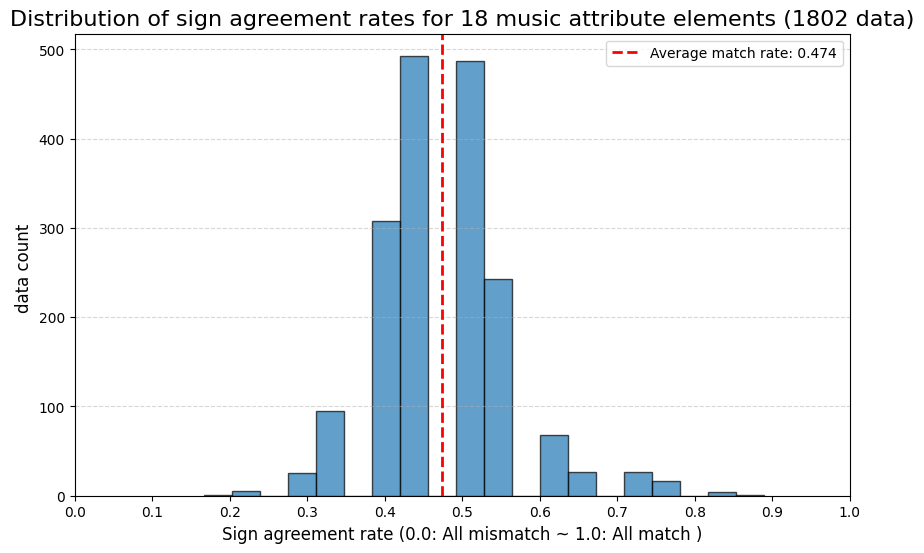

In [39]:
# 評価
# モデルのクラスをロードする！
INPUT_SIZE = 1 # x : Valence
HIDDEN_SIZE = 32 # 隠れ層のユニット数（調整可能）
OUTPUT_SIZE = 18    # y : Encoder predict
model_V_c_a18 = Valence_CtoA18(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device)
#model_V_c_a18.load_state_dict(torch.load('Valence_c_a18_checkpoint.pt')['model_state_dict'])
model_V_c_a18.load_state_dict(torch.load("Valence_c_a18_thresholds_checkpoint.pt")['model_state_dict']) # 音楽属性値 - 閾値
#model_V_c_a18 = Valence_CtoA18_withArousal(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device) # 2→18
#model_V_c_a18.load_state_dict(torch.load("Valence_c_a18_thresholds_A_checkpoint.pt")['model_state_dict']) 
# ニューラルネットワーク
predict_Valence_V_c_a18 = (model_V_c_a18(th.from_numpy(Vc).to(torch.float32).unsqueeze(1).to(device)))#.reshape(-1, 1)


# -------------------
# cos類似度
import numpy as np
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

Valence_c_a1_all  = 0.0
for i in range(1802):
    Valence_c_a1_all0 = cos_sim((np.float32(Va_18))[i,:] , predict_Valence_V_c_a18.cpu().detach().numpy()[i,:]) # .reshape(-1, 1)なし(2→1次元)
    if np.isnan(Valence_c_a1_all0) ==  False: 
        Valence_c_a1_all = Valence_c_a1_all + Valence_c_a1_all0
    '''
    if i%10:
        print("正解音楽属性値" + str(np.float32(Va_18)[i,:] - np.float32(thresholds_rep[i,Valence_feature_index])))
        print("予測音楽属性値" + str(predict_Valence_V_c_a18.cpu().detach().numpy()[i,:] - np.float32(thresholds_rep[i,Valence_feature_index])))
        print("-------")
    '''
#print(score)
print(Valence_c_a1_all / 1802.0) #len(Valence_true))
#print(cos_sim(np.squeeze(np.float32(Va_18)) , np.squeeze(predict_Valence_V_c_a18.reshape(-1, 1).cpu().detach().numpy()))) # 一気にcos類似度を計算

# -------------------
# ピアソン相関係数
print(np.float32(predict_Valence_V_c_a18.cpu().detach().numpy()).shape)
from scipy.stats import pearsonr, spearmanr
pearson_r =0.0#[]
pearson_p =0.0#[][]
spearman_r =0.0#[][]
spearman_p =0.0#[][]
for V_data in range(1802):
    pearson_r0, pearson_p0 = pearsonr(np.squeeze(Va_18[V_data,:]), np.squeeze(np.float32(predict_Valence_V_c_a18.cpu().detach().numpy())[V_data,:]))
    spearman_r0, spearman_p0 = spearmanr((Va_18).reshape(-1, 1), (np.float32(predict_Valence_V_c_a18.reshape(-1, 1).cpu().detach().numpy())))  
    if np.isnan(pearson_r0) ==  False:
        pearson_r = pearson_r+pearson_r0 #pearson_r.append(pearson_r0)
    if np.isnan(pearson_p0) ==  False:
        pearson_p = pearson_p+pearson_p0 #pearson_p.append(pearson_p0)
    if np.isnan(spearman_r0) ==  False:
        spearman_r = spearman_r + spearman_r0 #spearman_r.append(spearman_r0)
    if np.isnan(spearman_p0) ==  False:
        spearman_p = spearman_p + spearman_p0 #spearman_p.append(spearman_p0)
print("Pearson r:", pearson_r/1802.0, "p:", pearson_p/1802.0)
print("Spearman rho:", spearman_r/1802.0, "p:", spearman_p/1802.0)

# -------------------
print('\n')
print('(実際の音楽属性値 - 閾値)の予測の精度：正負が一致しており、値の大きさはどれぐらい近いか?')
# 正負の一致度：np.sign()...正: 1.0, 負: -1.0, ゼロ: 0.0 
# sign_true = np.sign(np.float32(Va_18))
# sign_predict = np.sign(predict_Valence_V_c_a18.cpu().detach().numpy())
sign_true = np.sign(np.float32(Va_18)- np.float32(thresholds.repeat(1802,1).T[:,Valence_feature_index]))
sign_predict = np.sign(predict_Valence_V_c_a18.cpu().detach().numpy()- np.float32(thresholds.repeat(1802,1).T[:,Valence_feature_index]))

match_counts = np.sum(sign_true == sign_predict, axis=1)

# (D) 各データの一致率を算出（0.0 〜 1.0）
match_ratios = match_counts / 18
print(f"\n最初の5つのデータの一致数（18要素中）: {match_counts[:5]}")
print(f"最初の5つのデータの一致率: {match_ratios[:5]}")
plt.figure(figsize=(10, 6))

# ヒストグラム
# bin=20で、0.0から1.0までを20分割して、データがどの割合に集中しているかを見る
plt.hist(match_ratios, bins=20, edgecolor='black', alpha=0.7, color='#1f77b4')
plt.title('Distribution of sign agreement rates for 18 music attribute elements (1802 data)', fontsize=16)
plt.xlabel('Sign agreement rate (0.0: All mismatch ~ 1.0: All match )', fontsize=12)
plt.ylabel('data count ', fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.axvline(np.mean(match_ratios), color='red', linestyle='dashed', linewidth=2, label=f'Average match rate: {np.mean(match_ratios):.3f}')
plt.legend()
plt.xticks(np.arange(0, 1.1, 0.1)) # x軸の目盛りを0.1刻みに
plt.show()


### Arousalモデル (1→18)

* VA : 全データのValence・Arousal値  
* attribute：全データの音楽属性値(1495つ)

In [78]:
# データセット
from sklearn.model_selection import train_test_split # 学習用・テスト用データに分割 
from torch.utils.data import TensorDataset, DataLoader

# 学習データセット
# Arousal
#Ac = np.float32(VA[:,1])
# Valenceの要素も加える
Ac = np.float32(VA)
Aa_18 = np.float32((attribute[:,feature_index])[:,Arousal_feature_index]) #- np.float32(thresholds_rep[:,Valence_feature_index])
train_Ac , valid_Ac , train_Aa_18 , valid_Aa_18 = train_test_split(Ac,Aa_18,test_size=0.2, random_state=0)
# データローダ
batch_size = 32
train_dataset_A_c_a18 = TensorDataset(th.from_numpy(train_Ac).unsqueeze(1), th.from_numpy(train_Aa_18))
valid_dataset_A_c_a18 = TensorDataset(th.from_numpy(valid_Ac).unsqueeze(1), th.from_numpy(valid_Aa_18))
test_dataset_A_c_a18 = TensorDataset(th.from_numpy(Ac).unsqueeze(1), th.from_numpy(Aa_18))
train_dataloader_A_c_a18 = DataLoader(train_dataset_A_c_a18,batch_size=batch_size,shuffle=True,)
valid_dataloader_A_c_a18 = DataLoader(valid_dataset_A_c_a18,batch_size=batch_size,shuffle=True,)
test_dataloader_A_c_a18 = DataLoader(test_dataset_A_c_a18,batch_size=batch_size,shuffle=False,)

In [82]:
# 学習
num_epochs = 1_000 # 最大エポック数
early_stopping_patience = 5 # 改善が見られなかった場合に停止する Early Stopping のエポック数
device = computing_device() # 学習に使うデバイス

# モデル
INPUT_SIZE = 1 # x : Valence
HIDDEN_SIZE = 32 # 隠れ層のユニット数（調整可能）
OUTPUT_SIZE = 18    # y : Encoder predict
#model_A_c_a18 = Arousal_CtoA18(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device)
model_A_c_a18 = Arousal_CtoA18_withValence(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device) # 2→18

#criterion = nn.MSELoss() # 損失関数
criterion = MultiThresholdSignLoss(thresholds=thresholds.T[:,Arousal_feature_index],device=device ,penalty_weight=5.0) # 5, 70,30
optimizer_A_c_a18 = optim.Adam(model_A_c_a18.parameters()) # LEARNING_RATE = 0.001 # オプティマイザ
#checkpoint_path_A_c_a18 = "Arousal_c_a18_checkpoint.pt" # 途中結果を記録するパス
#checkpoint_path_A_c_a18 = "Arousal_c_a18_thresholds_checkpoint.pt" # 音楽属性値 - 閾値 のペナルティ
checkpoint_path_A_c_a18 = "Arousal_c_a18_thresholds_V_checkpoint.pt" # 音楽属性値 - 閾値　のペナルティ + Arousalの値
    
# 学習する
train_CtoA18(
    model_A_c_a18,
    train_dataloader_A_c_a18,
    valid_dataloader_A_c_a18,
    device,
    criterion,
    optimizer_A_c_a18,
    num_epochs,
    early_stopping_patience,
    checkpoint_path_A_c_a18,
)

# ベストなモデルをロードする
checkpoint_A_c_a18 = torch.load(checkpoint_path_A_c_a18)
model_A_c_a18.load_state_dict(checkpoint_A_c_a18["model_state_dict"])
best_epoch_A_c_a18 = checkpoint_A_c_a18["epoch"]
best_val_loss_A_c_a18 = checkpoint_A_c_a18["loss"]

# テストデータを評価する
test_loss_A_c_a18 = evaluate_CtoA18(
    model_A_c_a18,
    test_dataloader_A_c_a18,
    device,
    criterion,
)
print(f"Epoch: {best_epoch_A_c_a18}, Validation Loss: {best_val_loss_A_c_a18:.5f}")
print(f"Test Set Evaluation - Loss: {test_loss_A_c_a18:.5f}")

Device: cuda:2
Epoch [1/1000], Training Loss: 78.62786
Epoch [1/1000], Validation Loss: 72.61994
Epoch [2/1000], Training Loss: 43.62757
Epoch [2/1000], Validation Loss: 5.58321
Epoch [3/1000], Training Loss: 1.33964
Epoch [3/1000], Validation Loss: 1.12317
Epoch [4/1000], Training Loss: 1.08796
Epoch [4/1000], Validation Loss: 1.07168
Epoch [5/1000], Training Loss: 0.99960
Epoch [5/1000], Validation Loss: 1.00025
Epoch [6/1000], Training Loss: 0.95899
Epoch [6/1000], Validation Loss: 0.92980
Epoch [7/1000], Training Loss: 0.93888
Epoch [7/1000], Validation Loss: 0.87598
Epoch [8/1000], Training Loss: 0.92159
Epoch [8/1000], Validation Loss: 0.85032
Epoch [9/1000], Training Loss: 0.91014
Epoch [9/1000], Validation Loss: 0.79989
Epoch [10/1000], Training Loss: 0.90938
Epoch [10/1000], Validation Loss: 0.80057
Epoch [11/1000], Training Loss: 0.91855
Epoch [11/1000], Validation Loss: 0.80245
Epoch [12/1000], Training Loss: 0.89038
Epoch [12/1000], Validation Loss: 0.82968
Epoch [13/1000],

/tmp/ipykernel_886216/2895477675.py:20: RuntimeWarning: invalid value encountered in float_scalars
  return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))


0.9986976946101469
(1802, 18)
Pearson r: 0.9987201119700793 p: 9.697536331124041e-12
Spearman rho: 0.7969197223968322 p: 0.0
(実際の音楽属性値 - 閾値)の予測の精度：正負が一致しており、値の大きさはどれぐらい近いか?

最初の5つのデータの一致数（18要素中）: [18 18 17 16 16]
最初の5つのデータの一致率: [1.         1.         0.94444444 0.88888889 0.88888889]


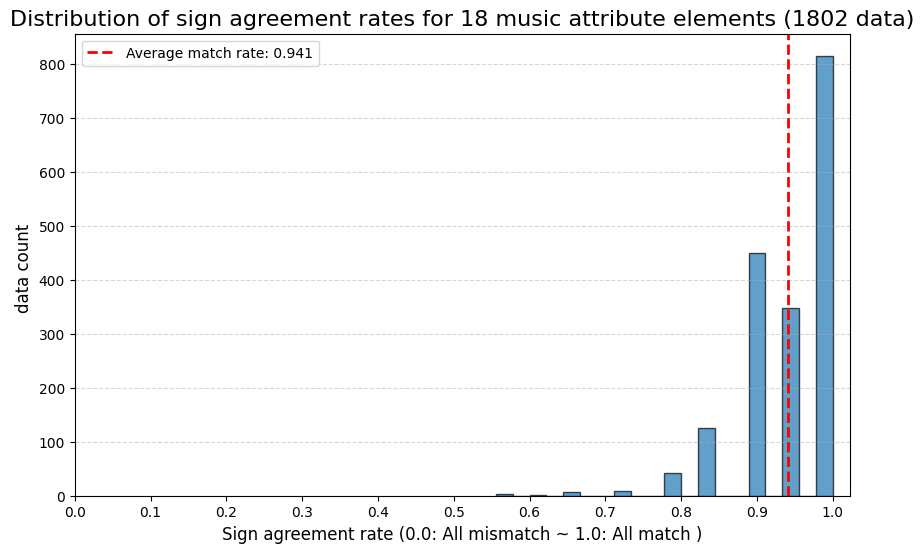

In [83]:
# 評価
# モデルのクラスをロードする！
INPUT_SIZE = 1 # x : Valence
HIDDEN_SIZE = 32# 隠れ層のユニット数（調整可能）
OUTPUT_SIZE = 18    # y : Encoder predict
#model_A_c_a18 = Arousal_CtoA18(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device)
#model_A_c_a18.load_state_dict(torch.load('Arousal_c_a18_checkpoint.pt')['model_state_dict'])
#model_A_c_a18.load_state_dict(torch.load("Arousal_c_a18_thresholds_checkpoint.pt")['model_state_dict']) # 音楽属性値 - 閾値
model_A_c_a18 = Arousal_CtoA18_withValence(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device) # 2→18
model_A_c_a18.load_state_dict(torch.load("Arousal_c_a18_thresholds_V_checkpoint.pt")['model_state_dict']) 

# ニューラルネットワーク
predict_Arousal_A_c_a18 = (model_A_c_a18(th.from_numpy(Ac).to(torch.float32).unsqueeze(1).to(device)))#.reshape(-1, 1)


# -------------------
# cos類似度
import numpy as np
def cos_sim(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

Arousal_c_a1_all  = 0.0
for i in range(1802):
    Arousal_c_a1_all0 = cos_sim((np.float32(Aa_18))[i,:] , predict_Arousal_A_c_a18.cpu().detach().numpy()[i,:]) # .reshape(-1, 1)なし(2→1次元)
    if np.isnan(Arousal_c_a1_all0) ==  False: 
        Arousal_c_a1_all = Arousal_c_a1_all + Arousal_c_a1_all0
    '''
    if i%100:
        print("正解音楽属性値" + str(np.float32(Aa_18)[i,:] - np.float32(thresholds_rep[i,Arousal_feature_index])))
        print("予測音楽属性値" + str(predict_Arousal_A_c_a18.cpu().detach().numpy()[i,:] - np.float32(thresholds_rep[i,Arousal_feature_index])))
        print("-------")
    '''
#print(score)
print(Arousal_c_a1_all / 1802.0) #len(Valence_true))
#print(cos_sim(np.squeeze(np.float32(Va_18)) , np.squeeze(predict_Valence_V_c_a18.reshape(-1, 1).cpu().detach().numpy()))) # 一気にcos類似度を計算

# -------------------
# ピアソン相関係数
print(np.float32(predict_Arousal_A_c_a18.cpu().detach().numpy()).shape)
from scipy.stats import pearsonr, spearmanr
pearson_r =0.0#[]
pearson_p =0.0#[][]
spearman_r =0.0#[][]
spearman_p =0.0#[][]
for A_data in range(1802):
    pearson_r0, pearson_p0 = pearsonr(np.squeeze(Aa_18[A_data,:]), np.squeeze(np.float32(predict_Arousal_A_c_a18.cpu().detach().numpy())[A_data,:]))
    spearman_r0, spearman_p0 = spearmanr((Aa_18).reshape(-1, 1), (np.float32(predict_Arousal_A_c_a18.reshape(-1, 1).cpu().detach().numpy())))  
    if np.isnan(pearson_r0) ==  False:
        pearson_r = pearson_r+pearson_r0 #pearson_r.append(pearson_r0)
    if np.isnan(pearson_p0) ==  False:
        pearson_p = pearson_p+pearson_p0 #pearson_p.append(pearson_p0)
    if np.isnan(spearman_r0) ==  False:
        spearman_r = spearman_r + spearman_r0 #spearman_r.append(spearman_r0)
    if np.isnan(spearman_p0) ==  False:
        spearman_p = spearman_p + spearman_p0 #spearman_p.append(spearman_p0)
print("Pearson r:", pearson_r/1802.0, "p:", pearson_p/1802.0)
print("Spearman rho:", spearman_r/1802.0, "p:", spearman_p/1802.0)


# -------------------
print('(実際の音楽属性値 - 閾値)の予測の精度：正負が一致しており、値の大きさはどれぐらい近いか?')
# 正負の一致度：np.sign()...正: 1.0, 負: -1.0, ゼロ: 0.0 
sign_true = np.sign(np.float32(Aa_18) - np.float32(thresholds.repeat(1802,1).T[:,Arousal_feature_index]))
sign_predict = np.sign(predict_Arousal_A_c_a18.cpu().detach().numpy() - np.float32(thresholds.repeat(1802,1).T[:,Arousal_feature_index]))
match_counts = np.sum(sign_true == sign_predict, axis=1)

# (D) 各データの一致率を算出（0.0 〜 1.0）
match_ratios = match_counts / 18
print(f"\n最初の5つのデータの一致数（18要素中）: {match_counts[:5]}")
print(f"最初の5つのデータの一致率: {match_ratios[:5]}")
plt.figure(figsize=(10, 6))

# ヒストグラム
# bin=20で、0.0から1.0までを20分割して、データがどの割合に集中しているかを見る
plt.hist(match_ratios, bins=20, edgecolor='black', alpha=0.7, color='#1f77b4')
plt.title('Distribution of sign agreement rates for 18 music attribute elements (1802 data)', fontsize=16)
plt.xlabel('Sign agreement rate (0.0: All mismatch ~ 1.0: All match )', fontsize=12)
plt.ylabel('data count ', fontsize=12)
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.axvline(np.mean(match_ratios), color='red', linestyle='dashed', linewidth=2, label=f'Average match rate: {np.mean(match_ratios):.3f}')
plt.legend()
plt.xticks(np.arange(0, 1.1, 0.1)) # x軸の目盛りを0.1刻みに
plt.show()

## 学習済みDEAMモデルを実際に用いた入力感情 

1. Valence  
→ BEST：**DEAM_Valence_c_a18_model.pt**
* Valence_c_a18_checkpoint.pt
* Valence_c_a18_thresholds_checkpoint.pt
* Valence_c_a18_thresholds_A_checkpoint.pt  
----------------------------------  
2. Arousal  
→ BEST：**DEAM_Arousal_c_a18_model.pt**
* Arousal_c_a18_checkpoint.pt
* Arousal_c_a18_thresholds_checkpoint.pt
* Arousal_c_a18_thresholds_V_checkpoint.pt

In [7]:
import random
import numpy as np
import torch as th
import torch.nn as nn
from torch.nn import functional as F
import torch.optim as optim
from matplotlib import pyplot as plt
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms

In [2]:
def computing_device(force=None):
    """環境によって計算に使うデバイスを切り替える関数"""
    if force is not None:
        return force
    if torch.cuda.is_available():
        return "cuda:2"
    if torch.backends.mps.is_available():
        return "mps"
    return "cpu"

class Valence_CtoA18(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Valence_CtoA18, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size * 2) 
        self.fc3 = nn.Linear(hidden_size * 2 , hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU() #nn.LeakyReLU(0.01) 
        self.fc5 = nn.Linear(hidden_size * 2, hidden_size * 4) 
        self.fc6 = nn.Linear(hidden_size * 4 , hidden_size * 2)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        #x = self.relu(self.fc5(x))
        #x = self.relu(self.fc6(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        
        return x
    
class Arousal_CtoA18(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Arousal_CtoA18, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size * 2) 
        self.fc3 = nn.Linear(hidden_size * 2 , hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU() # nn.LeakyReLU(0.01)
        self.fc5 = nn.Linear(hidden_size * 2, hidden_size * 4) 
        self.fc6 = nn.Linear(hidden_size * 4 , hidden_size * 2)
        
    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        #x = self.relu(self.fc5(x))
        #x = self.relu(self.fc6(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        #x = self.relu(self.fc4(x))
        return x

class Valence_CtoA18_withArousal(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Valence_CtoA18_withArousal, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size * 2) 
        self.fc3 = nn.Linear(hidden_size * 2 , hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU() # nn.LeakyReLU(0.01)
        self.lrelu = nn.LeakyReLU(0.01)
        # Dropout層
        self.aux_dropout = nn.Dropout(p=0.5)  # x2専用のDropout層 (確率を高く設定=よく消える)
        # バイアス層：input_size = 1
        self.aux_net = nn.Linear(input_size, output_size, bias=False) # バイアス項として働く,bias=Falseにすることで純粋な係数に
        with torch.no_grad(): # もしx2の影響を最初から極小にしておきたい場合、重みを小さく初期化する
            self.aux_net.weight.mul_(0.01) # 重みを0.01倍にする
        
    def forward(self, x):
        # Dropout層
        '''
        x2_dropped = self.aux_dropout(torch.squeeze(x)[:,1]) # x2 にだけ Dropout をかける [32]に次元数を減らす
        x_cat = torch.cat([torch.unsqueeze(torch.squeeze(x)[:,0],1), torch.unsqueeze(x2_dropped,1)], dim=1) # 結合してネットワークへ [32,1]
        x = self.relu(self.fc1(x_cat)
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        ''' 
        # バイアス層 
        x1 = torch.unsqueeze(torch.squeeze(x,1)[:,0],1)
        x2 = torch.unsqueeze(torch.squeeze(x,1)[:,1],1)
        x1 = self.relu(self.fc1(x1))
        x1 = self.relu(self.fc2(x1))
        x1 = self.relu(self.fc3(x1))
        main_out = self.fc4(x1) # main_out
        aux_out = self.aux_net(x2)
        #x = self.relu(main_out + aux_out) # 足し合わせてから、最終的な活性化関数(ReLU)を通す
        x = (main_out + aux_out)
        
        return x

class Arousal_CtoA18_withValence(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Arousal_CtoA18_withValence, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size * 2) 
        self.fc3 = nn.Linear(hidden_size * 2 , hidden_size)
        self.fc4 = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU() # nn.LeakyReLU(0.01)
        self.lrelu = nn.LeakyReLU(0.01)
        self.aux_dropout = nn.Dropout(p=0.5)  # x2専用のDropout層 (確率を高く設定=よく消える)
        # バイアス層：input_size = 1
        self.aux_net = nn.Linear(input_size, output_size, bias=False) # バイアス項として働く,bias=Falseにすることで純粋な係数に
        with torch.no_grad(): # もしx2の影響を最初から極小にしておきたい場合、重みを小さく初期化する
            self.aux_net.weight.mul_(0.01) # 重みを0.01倍にする
        
    def forward(self,  x):
        '''
        x1_dropped = self.aux_dropout(torch.squeeze(x)[:,0]) # x2 にだけ Dropout をかける
        x_cat = torch.cat([torch.unsqueeze(torch.squeeze(x)[:,0],1), torch.unsqueeze(x2_dropped,1)], dim=1) # 結合してネットワークへ
        x = self.relu(self.fc1(x_cat))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        '''
        # バイアス層 
        x1 = torch.unsqueeze(torch.squeeze(x,1)[:,0],1)
        x2 = torch.unsqueeze(torch.squeeze(x,1)[:,1],1)
        x2 = self.relu(self.fc1(x2))
        x2 = self.relu(self.fc2(x2))
        x2 = self.relu(self.fc3(x2))
        main_out = self.fc4(x2) # main_out
        aux_out = self.aux_net(x1)
        x = self.relu(main_out + aux_out) # 足し合わせてから、最終的な活性化関数(ReLU)を通す
        #x = (main_out + aux_out) 
        
        return x    

def train_CtoA18(
    model,
    train_dataloader,
    valid_dataloader,
    device,
    criterion,
    optimizer,
    num_epochs,
    early_stopping_patience,
    checkpoint_path="checkpoint.pt",
):
    """学習に使う関数"""
    print(f"Device: {device}")

    # Early Stopping に使うカウンタ
    early_stopping_patience_counter = 0
    # Early Stopping に使う検証データに対する損失
    early_stopping_best_val_loss = float("inf")

    for epoch in range(1, num_epochs + 1):
        model.train()
        running_loss = 0.0
        for coordinate, attribute in train_dataloader:
            # ラベルは使用しない
            inputs = coordinate.to(device)
            true_output = attribute.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)

            loss = criterion(outputs, true_output)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        print(f"Epoch [{epoch}/{num_epochs}], Training Loss: {running_loss / len(train_dataloader):.5f}")

        val_loss = evaluate_CtoA18(model, valid_dataloader, device, criterion)
        print(f"Epoch [{epoch}/{num_epochs}], Validation Loss: {val_loss:.5f}")

        if early_stopping_patience == -1:
            continue

        if val_loss < early_stopping_best_val_loss:
            early_stopping_best_val_loss = val_loss
            early_stopping_patience_counter = 0
            # ベストなモデルとして Checkpoint を更新する
            checkpoint_params = {
                "epoch": epoch,
                "model_state_dict": model.state_dict(),
                "optimizer_state_dict": optimizer.state_dict(),
                "loss": val_loss,
            }
            torch.save(
                checkpoint_params,
                checkpoint_path,
            )
        else:
            early_stopping_patience_counter += 1

        if early_stopping_patience_counter >= early_stopping_patience:
            print(f"Early stopping at epoch {epoch + 1}")
            break

    print("Training Finished")
    
 
def evaluate_CtoA18(model, dataloader, device, criterion):
    """評価に使う関数"""
    model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for coordinate, attribute in dataloader:
            inputs = coordinate.to(device)
            true_output = attribute.to(device)

            outputs = model(inputs)

            loss = criterion(outputs, true_output)
            running_loss += loss.item()

    average_loss = running_loss / len(dataloader)

    return average_loss


# 損失関数：予測値からthresholdsを引き、正負が異なってたらペナルティを加える
class MultiThresholdSignLoss(nn.Module):
    def __init__(self, thresholds,device ,penalty_weight=5.0):
        super().__init__()
        
        self.penalty_weight = penalty_weight # 正負が不一致の場合のペナルティ倍率
        self.base_loss = nn.MSELoss(reduction='none') 
        self.device = device
        
        if not isinstance(thresholds, torch.Tensor): # 閾値をTensor化し、学習対象外(buffer)として登録、GPU/CPU移動時に自動でついてくる
            thresholds = torch.tensor(thresholds, dtype=torch.float32).to(device)
        self.register_buffer('thresholds', thresholds)
        

    def forward(self, pred, target):
        # 1. MSELoss
        loss = self.base_loss(pred, target) #shape: (Batch, 18)
        
        # 2. 閾値を引いた「相対値」を計算
        pred_shifted = pred - self.thresholds
        target_shifted = target - self.thresholds
        
        # 3. 正負不一致の判定：掛け算してマイナスなら符号が逆 (True/False)
        sign_mismatch = (pred_shifted * target_shifted) < 0
        
        # 4. ペナルティの適用：不一致なら loss * penalty_weight、一致なら loss * 1.0
        weights = torch.ones_like(loss)
        weights[sign_mismatch] = self.penalty_weight
        
        weighted_loss = loss * weights
        
        # 5. 全体の平均を返す
        return weighted_loss.mean()

In [4]:
Valence_feature_index = [1, 2, 3, 5, 20, 22, 25, 26, 35, 37, 40, 41, 42, 43, 44, 45, 49, 57]
Arousal_feature_index = [62, 63, 64, 67, 68, 69, 70, 71, 73, 75, 77, 81, 84, 85, 87, 92, 95, 99]

In [17]:
INPUT_SIZE = 1 # x : Valence
HIDDEN_SIZE = 32# 隠れ層のユニット数（調整可能）
OUTPUT_SIZE = 18    # y : Encoder predict
device = computing_device() # 学習に使うデバイス

# 入力：座標
xy_coordinate = th.tensor([[0.4,0.5],[-0.4,0.5],[-0.4,-0.5],[0.4,-0.5]])
# 出力：音楽属性値
music_attribute_18_2 = th.zeros(4,100)

# Valence
model_V_c_a18 = Valence_CtoA18(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device)
model_V_c_a18.load_state_dict(torch.load("DEAM_Valence_c_a18_model.pt")['model_state_dict']) # 音楽属性値 - 閾値
# Arousal
model_A_c_a18 = Arousal_CtoA18_withValence(INPUT_SIZE, HIDDEN_SIZE, OUTPUT_SIZE).to(device) # 2→18
model_A_c_a18.load_state_dict(torch.load("DEAM_Arousal_c_a18_model.pt")['model_state_dict']) 

# Valence：predict
predict_Valence_V_c_a18  = model_V_c_a18(xy_coordinate[:,0].to(torch.float32).unsqueeze(1).to(device))
music_attribute_18_2[:,Valence_feature_index] = predict_Valence_V_c_a18.cpu().detach()
# Arousal
predict_Arousal_A_c_a18 = model_A_c_a18(th.tensor(xy_coordinate).to(torch.float32).unsqueeze(1).to(device))
music_attribute_18_2[:,Arousal_feature_index] = predict_Arousal_A_c_a18.cpu().detach()


th.save(music_attribute_18_2,'../../../../../../../../input_emotion_*/input_emotion_18_2_DEAM.pt')
print(music_attribute_18_2[0,:])

tensor([0.0000e+00, 7.2124e-02, 7.0466e-02, 9.9582e-02, 0.0000e+00, 6.8629e-02,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 2.3901e-02, 0.0000e+00, 1.2420e-02, 0.0000e+00,
        0.0000e+00, 2.3715e-01, 5.4478e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.4786e-02,
        0.0000e+00, 2.6452e-02, 0.0000e+00, 0.0000e+00, 9.0849e-03, 2.8261e-02,
        2.5497e-02, 4.7131e-03, 2.4026e-03, 3.4619e-03, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 5.3765e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 4.4960e-01, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 6.2734e-02, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0423e+00, 0.0000e+

/tmp/ipykernel_2316037/4170515669.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  predict_Arousal_A_c_a18 = model_A_c_a18(th.tensor(xy_coordinate).to(torch.float32).unsqueeze(1).to(device))
